# Merge TSS output from HOMER findcsRNATSS 

In [1]:
%%bash
ls -1 /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer

log
out_annotate
out_bedgraph
out_findPeak
out_findTSS
out_merge
tags
test
tss_count_raw.txt
tss_count_rlg.txt


In [2]:
%%bash
ls -1 /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_merge

mergePeak
mergeTSS
mergeTSS_rna00
mergeTSS_rna00_maxlen


In [3]:
%%bash
ls -1 /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_cap*/out.tss.txt

/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_cap00/out.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_cap00_rna00/out.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_cap15/out.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_cap15_rna15/out.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_cap60/out.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_cap60_rna60/out.tss.txt


In [4]:
%%bash
head -3 /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_cap*/out.tss.txt

==> /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_cap00/out.tss.txt <==
#tssID	chr	start	end	strand	score	focusRatio	csRNA	csRNAinput	rnaseq	annotation	Log2Ratio vs. Input	Log2Ratio vs. RNA	rev-csRNA	rev-csRNAinput	rev-RNA	BidirectionalRatio
chr14-1	chr14	49862475	49862625	+	6671.1	0.974	6669.47	na	na	na	na	na	0.00	na	na	9.70508587391282
chr14-2	chr14	49862774	49862924	-	6293.9	0.314	4910.20	na	na	na	na	na	47.95	na	na	6.45784846230358

==> /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_cap00_rna00/out.tss.txt <==
#tssID	chr	start	end	strand	score	focusRatio	csRNA	csRNAinput	rnaseq	annotation	Log2Ratio vs. Input	Log2Ratio vs. RNA	rev-csRNA	rev-csRNAinput	rev-RNA	BidirectionalRatio
chr14-1	chr14	49862475	49862625	+	6671.1	0.974	6669.47	na	9.24	na	na	8.59739800459845	0.00	na	0.16	9.70508587391282
chr14-2	chr14	49862774	49862924	-	6293.9	0.314	4910.20	na	4.73	na	na	8.59375417426598	47.95	na	0.26	6.45784846230358

==> /gpfs/fs1/data/reddylab/Kuei/Dex_P

In [5]:
%%bash
module load perl
module load gcc
source /data/reddylab/software/miniconda2/bin/activate alex_dev
export PATH=/data/reddylab/software/homer/bin/:$PATH
sbatch -pnew,all \
    --mem 16G \
    -o /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/log/mergeTSS.txt \
    <<'EOF'
#!/bin/bash

### Set Directories
FD_OUT=/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer
FD_TSS=$FD_OUT/out_findTSS
FD_MERGE=$FD_OUT/out_merge/mergeTSS

FP_TSS_T00=${FD_TSS}/tss_cap00/out.tss.txt
FP_TSS_T15=${FD_TSS}/tss_cap15/out.tss.txt
FP_TSS_T60=${FD_TSS}/tss_cap60/out.tss.txt
FP_TSS_MERGE=${FD_MERGE}/tss_merge.txt
FP_TSS_SHIFT=${FD_MERGE}/tss_shift.txt
FP_TSS_SHIST=${FD_MERGE}/tss_shist.txt

### Merge TSS cluster positions from two separate experiments into 
### a single set of non-redundant TSS clusters
# mergePeaks exp1-rep1.tss.txt exp1-rep2.tss.txt exp2-rep1.tss.txt exp2-rep2.tss.txt -strand > merged.tss.txt
# mergePeaks exp1.tss.txt exp2.tss.txt -strand > merged.tss.txt
mergePeaks $FP_TSS_T00 $FP_TSS_T15 $FP_TSS_T60 -strand > $FP_TSS_MERGE

EOF

Submitted batch job 24751250


In [4]:
%%bash
module load perl
module load gcc
source /data/reddylab/software/miniconda2/bin/activate alex_dev
export PATH=/data/reddylab/software/homer/bin/:$PATH
sbatch -pnew,all \
    --mem 16G \
    -o /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/log/mergeTSS_rna00.txt \
    <<'EOF'
#!/bin/bash

# mergePeaks exp1-rep1.tss.txt exp1-rep2.tss.txt exp2-rep1.tss.txt exp2-rep2.tss.txt -strand > merged.tss.txt
# mergePeaks exp1.tss.txt exp2.tss.txt -strand > merged.tss.txt

#FP_TSS1=/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t15v00.tss.txt
#FP_TSS2=/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t60v00.tss.txt
#FP_TSSM=/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/merge

FD_OUT=/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer
FD_IN=$FD_OUT/out_findTSS
FD_OT=$FD_OUT/out_merge/mergeTSS_rna00

FP_TSS_T15=${FD_IN}/tss_t15v00_rna00/out.tss.txt
FP_TSS_T60=${FD_IN}/tss_t60v00_rna00/out.tss.txt
FP_TSS_MERGE=${FD_OT}/tss_merge.txt
FP_TSS_SHIFT=${FD_OT}/tss_shift.txt
FP_TSS_SHIST=${FD_OT}/tss_shist.txt

### Merge TSS cluster positions from two separate experiments into 
### a single set of non-redundant TSS clusters
mergePeaks $FP_TSS_T15 $FP_TSS_T60 -strand > $FP_TSS_MERGE

#annotatePeaks.pl <tss/peak/BED file> <genome> -p <tss/peak/BED file2> -pdist2 -strand + > outputFile.txt
#annotatePeaks.pl exp1.tss.txt hg38 -p exp2.tss.txt -pdist2 -strand + > output.txt
annotatePeaks.pl \
    $FP_TSS_T15 \
    hg38 \
    -p $FP_TSS_T60 \
    -pdist2 -strand + > $FP_TSS_SHIFT

#annotatePeaks.pl <tss/peak/BED file> <genome> -p <tss/peak/BED file2> -size <#> -hist <#> -strand + > outputFile.txt
#annotatePeaks.pl exp1.tss.txt hg38 -p exp2.tss.txt -size 1000 -hist 10 -strand + > outputFile.txt
annotatePeaks.pl \
    $FP_TSS_T15 \
    hg38 \
    -p $FP_TSS_T60 \
    -size 1000 -hist 10 -strand + > $FP_TSS_SHIST
EOF

Submitted batch job 24720340


In [5]:
%%bash
module load perl
module load gcc
source /data/reddylab/software/miniconda2/bin/activate alex_dev
export PATH=/data/reddylab/software/homer/bin/:$PATH
sbatch -pnew,all \
    --mem 16G \
    -o /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/log/mergeTSS_rna00_maxlen.txt \
    <<'EOF'
#!/bin/bash

# mergePeaks exp1-rep1.tss.txt exp1-rep2.tss.txt exp2-rep1.tss.txt exp2-rep2.tss.txt -strand > merged.tss.txt
# mergePeaks exp1.tss.txt exp2.tss.txt -strand > merged.tss.txt

#FP_TSS1=/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t15v00.tss.txt
#FP_TSS2=/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t60v00.tss.txt
#FP_TSSM=/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/merge

FD_OUT=/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer
FD_IN=$FD_OUT/out_findTSS
FD_OT=$FD_OUT/out_merge/mergeTSS_rna00_maxlen

FP_TSS_T15=${FD_IN}/tss_t15v00_rna00_maxlen/out.tss.txt
FP_TSS_T60=${FD_IN}/tss_t60v00_rna00_maxlen/out.tss.txt
FP_TSS_MERGE=${FD_OT}/tss_merge.txt
FP_TSS_SHIFT=${FD_OT}/tss_shift.txt
FP_TSS_SHIST=${FD_OT}/tss_shist.txt

### Merge TSS cluster positions from two separate experiments into 
### a single set of non-redundant TSS clusters
mergePeaks $FP_TSS_T15 $FP_TSS_T60 -strand > $FP_TSS_MERGE

#annotatePeaks.pl <tss/peak/BED file> <genome> -p <tss/peak/BED file2> -pdist2 -strand + > outputFile.txt
#annotatePeaks.pl exp1.tss.txt hg38 -p exp2.tss.txt -pdist2 -strand + > output.txt
annotatePeaks.pl \
    $FP_TSS_T15 \
    hg38 \
    -p $FP_TSS_T60 \
    -pdist2 -strand + > $FP_TSS_SHIFT

#annotatePeaks.pl <tss/peak/BED file> <genome> -p <tss/peak/BED file2> -size <#> -hist <#> -strand + > outputFile.txt
#annotatePeaks.pl exp1.tss.txt hg38 -p exp2.tss.txt -size 1000 -hist 10 -strand + > outputFile.txt
annotatePeaks.pl \
    $FP_TSS_T15 \
    hg38 \
    -p $FP_TSS_T60 \
    -size 1000 -hist 10 -strand + > $FP_TSS_SHIST
EOF

Submitted batch job 24720343


In [60]:
!ls /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss*.tss.txt | cut -f1-5 | expand -t 15

/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_count.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_merge.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_shift.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_shist.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t15v00.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t60v00.tss.txt


In [61]:
!head /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_merge.tss.txt

#name (cmd = mergePeaks tss_t15v00.tss.txt tss_t60v00.tss.txt -strand)	chr	start	end	strand	Stat	Parent files	Total subpeaks	tss_t15v00.tss.txt	tss_t60v00.tss.txt
Merged-chr3-68932473-1	chr3	68932398	68932548	+	22.900000	tss_t60v00.tss.txt	1		chr3-2331
Merged-chr3-68932545-1	chr3	68932470	68932620	-	22.600000	tss_t60v00.tss.txt	1		chr3-2332
Merged-chr3-71785442-1	chr3	71785367	71785517	-	22.600000	tss_t60v00.tss.txt	1		chr3-2333
Merged-chr3-114152838-1	chr3	114152763	114152913	+	22.900000	tss_t60v00.tss.txt	1		chr3-2335
Merged-chr3-117997536-1	chr3	117997461	117997611	+	22.600000	tss_t60v00.tss.txt	1		chr3-2336
Merged-chr3-170358202-1	chr3	170358127	170358277	-	20.700001	tss_t60v00.tss.txt	1		chr3-2337
Merged-chr3-180448830-1	chr3	180448755	180448905	+	22.900000	tss_t60v00.tss.txt	1		chr3-2340
Merged-chr3-180448887-1	chr3	180448812	180448962	-	22.900000	tss_t60v00.tss.txt	1		chr3-2341
Merged-chr3-185175836-1	chr3	185175761	185175911	+	22.600000	tss_t60v00.tss.txt	1		chr3-2343


In [62]:
!head /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_shift.tss.txt

PeakID (cmd=annotatePeaks.pl tss_t15v00.tss.txt /gpfs/fs1/data/reddylab/Kuei/annotation/Homo_sapiens.GRCh38.dna.primary_assembly.fa -gtf /gpfs/fs1/data/reddylab/Kuei/annotation/gencode.v34.annotation.gtf -p tss_t60v00.tss.txt -pdist2 -strand +)	Chr	Start	End	Strand	Peak Score	Focus Ratio/Region Size	Annotation	Detailed Annotation	Distance to TSS	Nearest PromoterID	Entrez ID	Nearest Unigene	Nearest Refseq	Nearest Ensembl	Gene Name	Gene Alias	Gene Description	Gene Type	tss_t60v00.tss.txt Distance to nearest Peak, Peak ID
chr8-102	chr8	23068909	23069059	-	316.7	0.578	promoter-TSS (ENST00000523504.5)	NA	37	ENST00000347739.3									367
chr8-148	chr8	23068918	23069068	+	271.3	0.795	promoter-TSS (ENST00000523504.5)	NA	28	ENST00000347739.3									-376
chr9-348	chr9	124658354	124658504	+	179.4	0.962	promoter-TSS (ENST00000429139.1)	NA	-38	ENST00000429139.1									-64655
chr1-1129	chr1	109214864	109215014	-	151.9	0.694	exon (ENST00000482384.1, exon 2 of 2)	NA	957	ENST00000369923.4									-15

In [63]:
!head /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_shist.tss.txt

Distance from Center (cmd=annotatePeaks.pl tss_t15v00.tss.txt /gpfs/fs1/data/reddylab/Kuei/annotation/Homo_sapiens.GRCh38.dna.primary_assembly.fa -p tss_t60v00.tss.txt -size 1000 -hist 10 -strand +)	tss_t60v00.tss.txt
-500	0
-490	0
-480	0
-470	0
-460	0
-450	0
-440	0.000168350168350168
-430	0
-420	0


In [6]:
import numpy  as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [8]:
ls /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_merge/mergeTSS_rna00_maxlen

tss_merge.txt  tss_shift.txt  tss_shist.txt


In [11]:
fpath = "/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_merge/mergeTSS_rna00_maxlen/tss_shift.txt"
dat = pd.read_csv(fpath, sep="\t")
dat.head()

,PeakID (cmd=annotatePeaks.pl /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_t15v00_rna00_maxlen/out.tss.txt hg38 -p /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_t60v00_rna00_maxlen/out.tss.txt -pdist2 -strand +),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type,"/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_t60v00_rna00_maxlen/out.tss.txt Distance to nearest Peak, Peak ID"
0,chr8-54,chr8,23068947,23069097,-,401.6,0.871,promoter-TSS (NM_003842),promoter-TSS (NM_003842),9.0,NM_147187,8795.0,Hs.521456,NM_003842,ENSG00000120889,TNFRSF10B,CD262|DR5|KILLER|KILLER/DR5|TRAIL-R2|TRAILR2|T...,TNF receptor superfamily member 10b,protein-coding,405.0
1,chr8-53,chr8,23068918,23069068,+,400.8,0.833,promoter-TSS (NM_003842),promoter-TSS (NM_003842),38.0,NM_147187,8795.0,Hs.521456,NM_003842,ENSG00000120889,TNFRSF10B,CD262|DR5|KILLER|KILLER/DR5|TRAIL-R2|TRAILR2|T...,TNF receptor superfamily member 10b,protein-coding,-376.0
2,chr2-104,chr2,236569778,236569928,-,383.2,0.924,promoter-TSS (NM_020311),promoter-TSS (NM_020311),28.0,NM_020311,57007.0,Hs.471751,NM_020311,ENSG00000144476,ACKR3,CMKOR1|CXC-R7|CXCR-7|CXCR7|GPR159|RDC-1|RDC1,atypical chemokine receptor 3,protein-coding,3745.0
3,chr2-106,chr2,236569744,236569894,+,380.7,0.943,promoter-TSS (NM_020311),promoter-TSS (NM_020311),-6.0,NM_020311,57007.0,Hs.471751,NM_020311,ENSG00000144476,ACKR3,CMKOR1|CXC-R7|CXCR-7|CXCR7|GPR159|RDC-1|RDC1,atypical chemokine receptor 3,protein-coding,-3711.0
4,chr7-519,chr7,103867042,103867192,-,169.5,0.968,"intron (NM_005045, intron 2 of 64)","intron (NM_005045, intron 2 of 64)",122399.0,NM_173054,5649.0,Hs.655654,NM_005045,ENSG00000189056,RELN,ETL7|LIS2|PRO1598|RL,reelin,protein-coding,587284.0


In [9]:
fpath = "/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_merge/mergeTSS_rna00_maxlen/tss_shist.txt"
dat = pd.read_csv(fpath, sep="\t")
dat.head()

,Distance from Center (cmd=annotatePeaks.pl /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_t15v00_rna00_maxlen/out.tss.txt hg38 -p /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_t60v00_rna00_maxlen/out.tss.txt -size 1000 -hist 10 -strand +),/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/out_findTSS/tss_t60v00_rna00_maxlen/out.tss.txt
0,-500,0.000093
1,-490,0.000000
2,-480,0.000000
3,-470,0.000000
4,-460,0.000093


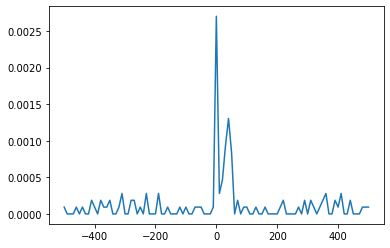

In [10]:
x = dat.iloc[:,0]
y = dat.iloc[:,1]
plt.plot(x, y)

In [44]:
%%bash
module load perl
module load gcc
source /data/reddylab/software/miniconda2/bin/activate alex_dev
export PATH=/data/reddylab/software/homer/bin/:$PATH
export PATH=/data/reddylab/software/homer/:$PATH
sbatch -pnew,all \
    --mem 16G \
    -o /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/log/mergeTSS.txt \
    <<'EOF'
#!/bin/bash

# mergePeaks exp1-rep1.tss.txt exp1-rep2.tss.txt exp2-rep1.tss.txt exp2-rep2.tss.txt -strand > merged.tss.txt
# mergePeaks exp1.tss.txt exp2.tss.txt -strand > merged.tss.txt

#FP_TSS1=/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t15v00.tss.txt
#FP_TSS2=/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t60v00.tss.txt
#FP_TSSM=/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/merge

cd /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/

FP_TSS_T15=tss_t15v00.tss.txt
FP_TSS_T60=tss_t60v00.tss.txt
FP_TSS_MERGE=tss_merge.tss.txt
FP_TSS_COUNT=tss_count.tss.txt

mergePeaks $FP_TSS_T15 $FP_TSS_T60 -strand > $FP_TSS_MERGE

annotatePeaks.pl exp1.tss.txt hg38 -p exp2.tss.txt -size 1000 -hist 10 -strand + > outputFile.txt

#annotatePeaks.pl merged.tss.txt hg38 -strand + -fragLength 1 -raw -d Exp1-tagDir/ Exp2-tagDir/ > counts.txt
FD_OUT=/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer
FD_GEN=/gpfs/fs1/data/reddylab/Kuei/annotation

FD_TAG_CAP_T15=$FD_OUT/tags/procap_t15
FD_TAG_CAP_T60=$FD_OUT/tags/procap_t60

annotatePeaks.pl \
    $FP_TSS_MERGE \
    $FD_GEN/Homo_sapiens.GRCh38.dna.primary_assembly.fa \
    -gtf $FD_GEN/gencode.v34.annotation.gtf \
    -strand + -fragLength 1 -raw -d $FD_TAG_CAP_T15/ $FD_TAG_CAP_T60/ > $FP_TSS_COUNT


EOF

Submitted batch job 24604737


In [45]:
!ls /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss*.tss.txt | cut -f1-5 | expand -t 15

/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_count.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_diffOutput.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_merge.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t15v00.tss.txt
/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t60v00.tss.txt


In [47]:
!head /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_diffOutput.tss.txt

PeakID (cmd=annotatePeaks.pl tss_merge.tss.txt /gpfs/fs1/data/reddylab/Kuei/annotation/Homo_sapiens.GRCh38.dna.primary_assembly.fa -gtf /gpfs/fs1/data/reddylab/Kuei/annotation/gencode.v34.annotation.gtf -strand + -fragLength 1 -raw -d /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/tags/procap_t15/ /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/tags/procap_t60/) (cmd=getDiffExpression.pl tss_count.tss.txt t15 t60)	Chr	Start	End	Strand	Peak Score	Focus Ratio/Region Size	Annotation	Detailed Annotation	Distance to TSS	Nearest PromoterID	Entrez ID	Nearest Unigene	Nearest Refseq	Nearest Ensembl	Gene Name	Gene Alias	Gene Description	Gene Type	/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/tags/procap_t15/ Tag Count in given bp (9252351.5 Total, normalization factor = 1, effective total = 10000000)	/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/tags/procap_t60/ Tag Count in given bp (13741782.5 Total, normalization factor = 1, effective total = 10000000)

In [41]:
!head /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_merge.tss.txt

#name (cmd = mergePeaks tss_t15v00.tss.txt tss_t60v00.tss.txt -strand)	chr	start	end	strand	Stat	Parent files	Total subpeaks	tss_t15v00.tss.txt	tss_t60v00.tss.txt
Merged-chr3-68932473-1	chr3	68932398	68932548	+	22.900000	tss_t60v00.tss.txt	1		chr3-2331
Merged-chr3-68932545-1	chr3	68932470	68932620	-	22.600000	tss_t60v00.tss.txt	1		chr3-2332
Merged-chr3-71785442-1	chr3	71785367	71785517	-	22.600000	tss_t60v00.tss.txt	1		chr3-2333
Merged-chr3-114152838-1	chr3	114152763	114152913	+	22.900000	tss_t60v00.tss.txt	1		chr3-2335
Merged-chr3-117997536-1	chr3	117997461	117997611	+	22.600000	tss_t60v00.tss.txt	1		chr3-2336
Merged-chr3-170358202-1	chr3	170358127	170358277	-	20.700001	tss_t60v00.tss.txt	1		chr3-2337
Merged-chr3-180448830-1	chr3	180448755	180448905	+	22.900000	tss_t60v00.tss.txt	1		chr3-2340
Merged-chr3-180448887-1	chr3	180448812	180448962	-	22.900000	tss_t60v00.tss.txt	1		chr3-2341
Merged-chr3-185175836-1	chr3	185175761	185175911	+	22.600000	tss_t60v00.tss.txt	1		chr3-2343


In [43]:
!head /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_count.tss.txt

PeakID (cmd=annotatePeaks.pl tss_merge.tss.txt /gpfs/fs1/data/reddylab/Kuei/annotation/Homo_sapiens.GRCh38.dna.primary_assembly.fa -gtf /gpfs/fs1/data/reddylab/Kuei/annotation/gencode.v34.annotation.gtf -strand + -fragLength 1 -raw -d /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/tags/procap_t15/ /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/tags/procap_t60/)	Chr	Start	End	Strand	Peak Score	Focus Ratio/Region Size	Annotation	Detailed Annotation	Distance to TSS	Nearest PromoterID	Entrez ID	Nearest Unigene	Nearest Refseq	Nearest Ensembl	Gene Name	Gene Alias	Gene Description	Gene Type	/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/tags/procap_t15/ Tag Count in given bp (9252351.5 Total, normalization factor = 1, effective total = 10000000)	/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/tags/procap_t60/ Tag Count in given bp (13741782.5 Total, normalization factor = 1, effective total = 10000000)
Merged-chr6-27139276-1	chr6	27139201	27139351	+	989.700012	tss_t60v00.tss.txt	ex

In [13]:
ls -l /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/merge

-rw-rw-r-- 1 kk319 reddylab 3746073 Feb 15 08:35 /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/merge


In [16]:
!head /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/merge

#name (cmd = mergePeaks /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t15v00.tss.txt /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t60v00.tss.txt -strand)	chr	start	end	strand	Stat	Parent files	Total subpeaks	/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t15v00.tss.txt	/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t60v00.tss.txt
Merged-chr3-68932473-1	chr3	68932398	68932548	+	22.900000	/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t60v00.tss.txt	1		chr3-2331
Merged-chr3-68932545-1	chr3	68932470	68932620	-	22.600000	/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t60v00.tss.txt	1		chr3-2332
Merged-chr3-71785442-1	chr3	71785367	71785517	-	22.600000	/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t60v00.tss.txt	1		chr3-2333
Merged-chr3-114152838-1	chr3	114152763	114152913	+	22.900000	/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t60v00

In [6]:
!head /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t15v00.tss.txt | cut -f1-5 | expand -t 15

#tssID         chr            start          end            strand
chr8-102       chr8           23068909       23069059       -
chr8-148       chr8           23068918       23069068       +
chr9-348       chr9           124658354      124658504      +
chr1-1129      chr1           109214864      109215014      -
chr7-587       chr7           103867013      103867163      +
chr7-609       chr7           103867042      103867192      -
chr8-484       chr8           127062628      127062778      +
chr1-1511      chr1           31704875       31705025       +
dm6_3R-13      dm6_3R         24057212       24057362       -


In [7]:
!head /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t15v00.tss.txt | cut -f6-10 | expand -t 15

score          focusRatio     csRNA          csRNAinput     rnaseq
316.7          0.578          312.35         145.98         102.10
271.3          0.795          271.28         122.54         6.97
179.4          0.962          179.95         85.78          1.37
151.9          0.694          151.85         68.20          3.51
142.7          0.976          142.67         59.14          0.00
135.6          0.973          134.02         55.41          0.00
118.9          0.630          118.89         54.88          0.00
118.3          0.712          118.35         50.08          0.00
114.6          0.704          114.03         52.75          0.00


In [8]:
!head /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t15v00.tss.txt | cut -f11-15 | expand -t 15

annotation     Log2Ratio vs. Input           Log2Ratio vs. RNA             rev-csRNA      rev-csRNAinput
singleExon     1.0569060147418               1.54083452159989              355.59         212.05
tssAntisense   1.09722031758872              4.22156613549434              79.44          53.28
tss            1.00299673120956              4.32615605727119              35.67          36.23
other          1.0688558412872               3.79575900553565              35.67          14.92
other          1.16614774745001              4.23524837937284              0.54           0.00
other          1.16331182995019              4.14995030168105              2.70           1.60
other          1.01290525443774              3.98743456692162              15.13          13.32
other          1.12131230583639              3.98128185405741              60.53          34.10
na             1.00627955142172              3.9310920550275               0.00           0.53


In [9]:
!head /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/out_findTSS/tss_t15v00.tss.txt | cut -f16-20 | expand -t 15

rev-RNA        BidirectionalRatio
1.24           -0.182663530402777
67.82          1.67534695588085
0.00           2.10563447915012
6.15           1.87200430788763
0.00           4.14101230952707
0.00           3.73041141016726
0.00           2.45574120606015
0.00           0.882618072170838
0.00           3.9310920550275
